**“Dynamic Pricing ile Stok Yönetimi Optimizasyonu”** Başlığındaki case özelinde gerçekleştirilmiş bir çalışmadır.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [48]:
df = pd.read_csv("C:\\Users\\rbesli\\Desktop\\CASE_2\\used_cars_data.csv", usecols=["price", "daysonmarket"])   #daysonmarket = pazarda kalma süresi
print(df.head())

   daysonmarket    price
0           522  23141.0
1           207  46500.0
2          1233  46995.0
3           196  67430.0
4           137  48880.0


In [49]:
df_clean = df.dropna(subset=['price', 'daysonmarket']) #eksik verileri temizliyoruz
df = df_clean 

**REGRESYON ANALİZİ** 

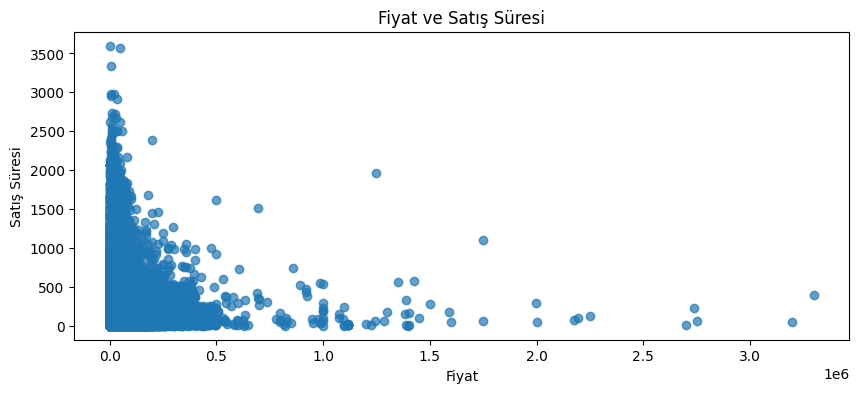

In [50]:
#İlk olarak fiyat - satış süresi bilgilerini genel olarak scatterplot ile görselleştirmek istedim.
plt.figure(figsize=(10, 4))
plt.scatter(df['price'], df['daysonmarket'], alpha=0.7)
plt.xlabel('Fiyat')
plt.ylabel('Satış Süresi')
plt.title('Fiyat ve Satış Süresi')
plt.savefig("fiyat-satis-total.png", dpi=300)
plt.show()

In [51]:
X, y = df[['price']], df['daysonmarket'] 

model = LinearRegression().fit(X, y) #model eğitimi yaptım 

#Sonuçları hazır fonksiyonlar ile döndürdüm
r2 = r2_score(y, model.predict(X)) #r2 determinasyon katsayısıdır. 1'e yakınsa iyiymiş. Veriyi ne kadar iyi açıkladığını gösteriyor bu kısım
print(f"R² Score: {r2:.4f}")
print(f"Fiyat katsayısı: {model.coef_[0]:.6f}") #fiyat arttığında gün sayısının ne kadar değiştiğini gösterir 
print(f"Intercept: {model.intercept_:.2f}") #intercept sabit terimi ifade eder. - > fiyat sıfırken tahmini gün sayısı. +b değeri gibi düşünebiliriz

R² Score: 0.0040
Fiyat katsayısı: 0.000352
Intercept: 65.52


**SİMÜLASYON**

c:\Users\rbesli\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\rbesli\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\rbesli\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\rbesli\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


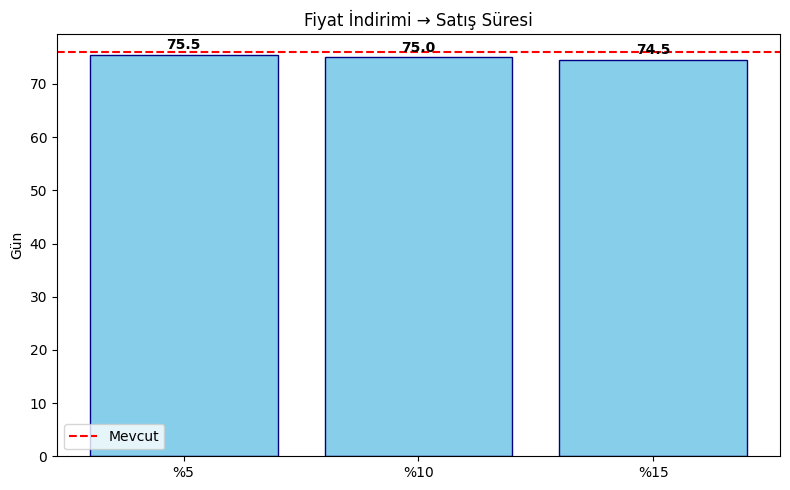

Mevcut: 76.1 gün
%5: 75.5 gün
%10: 75.0 gün
%15: 74.5 gün


In [52]:

model = LinearRegression().fit(df[['price']], df['daysonmarket'])
#model oluşturuldu. price (fiyat) -> daysonmarket (pazarda kalma süresi) ilişkisini öğrendi modelimiz

ortalama_fiyat = df['price'].mean()

mevcut_sure = model.predict([[ortalama_fiyat]])[0] #ortlama fiyata göre tahmini pazarda kalma süresi

indirimler = ['%5', '%10', '%15']
yeni_sureler = [] #ekleyeceğiz şimdilik boş liste

for indirim in [5, 10, 15]:
    yeni_fiyat = ortalama_fiyat * (1 - indirim/100)   #indirimli fiyatı atadık bu değişkene.
    yeni_sure = model.predict([[yeni_fiyat]])[0]      #tahmini süre belirledik indirimli fiyatımıza göre
    yeni_sureler.append(yeni_sure) #boş listemize ekliyoruz sonrasında bu listeyi görselleştircez

plt.figure(figsize=(8, 5))
bars = plt.bar(indirimler, yeni_sureler, color='skyblue', edgecolor='navy')

# Her çubuğun üzerine tahmini süre yazdırılıyor
for i, (bar, sure) in enumerate(zip(bars, yeni_sureler)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{sure:.1f}', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=mevcut_sure, color='red', linestyle='--', label='Mevcut') #farkı anlayabilmek için mevcut süreyi - - formatında ekledik tabloya kıyaslayacağız

plt.title('Fiyat İndirimi → Satış Süresi')
plt.ylabel('Gün')
plt.legend()
plt.tight_layout()

plt.savefig("indirimli-fiyat_satis-suresi.png", dpi=300) #sunuma eklemek için dosyamıza görseli kaydedelim dedim
plt.show()

#sonuçları konsola da yazdırarak nümerik olarak gözlemleyeceğiz
print(f"Mevcut: {mevcut_sure:.1f} gün")
for indirim, sure in zip(indirimler, yeni_sureler):
    print(f"{indirim}: {sure:.1f} gün")
